In [1]:

import os, time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow import keras

categories = os.listdir("./archive/crop_images")
print(categories)

img_size = (224, 224)

crop_images = keras.preprocessing.image_dataset_from_directory( # Imagenes normales
    "./archive/crop_images",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=img_size,
    shuffle=True
)


['jute', 'maize', 'rice', 'sugarcane', 'wheat']
Found 201 files belonging to 5 classes.


In [2]:

kag2 = keras.preprocessing.image_dataset_from_directory( # Augmented images
    "./archive/kag2",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=img_size,
    shuffle=True
)


Found 804 files belonging to 5 classes.


In [3]:

test_crop_image = keras.preprocessing.image_dataset_from_directory( # Imagenes para el test
    "./archive/test_crop_image",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=img_size,
    shuffle=True
)


Found 45 files belonging to 1 classes.


In [4]:

base_model = keras.applications.MobileNet( # Podemos probar MobileNetV2 o V3
    input_shape=(*img_size, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

17225924/17225924 [==============================] - 1s 0us/step


In [5]:

model = keras.Sequential([ # Se puede cambiar la red nueronal
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(16, activation="tanh"),
    keras.layers.Dense(len(categories), activation="softmax")
])


In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=tf.keras.metrics.CategoricalAccuracy())

In [11]:
print(crop_images)
print(kag2)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


In [15]:
#images =kag2 + crop_images
images = kag2
history = model.fit(images, batch_size=32, epochs=128, shuffle=True) # No se si el kag2 + crop_images este bien

Epoch 1/128
26/26 [==============================] - 16s 474ms/step - loss: 0.9965 - categorical_accuracy: 0.6754
Epoch 2/128
26/26 [==============================] - 12s 464ms/step - loss: 0.9338 - categorical_accuracy: 0.6530
Epoch 3/128
26/26 [==============================] - 13s 483ms/step - loss: 0.8810 - categorical_accuracy: 0.6915
Epoch 4/128
26/26 [==============================] - 9s 354ms/step - loss: 0.8447 - categorical_accuracy: 0.7164
Epoch 5/128
26/26 [==============================] - 9s 355ms/step - loss: 0.8086 - categorical_accuracy: 0.7289
Epoch 6/128
26/26 [==============================] - 9s 360ms/step - loss: 0.8060 - categorical_accuracy: 0.7326
Epoch 7/128
26/26 [==============================] - 10s 362ms/step - loss: 0.7843 - categorical_accuracy: 0.7239
Epoch 8/128
26/26 [==============================] - 9s 348ms/step - loss: 0.7244 - categorical_accuracy: 0.7624
Epoch 9/128
26/26 [==============================] - 9s 336ms/step - loss: 0.6964 - categori

In [16]:

model.evaluate(crop_images)

7/7 [==============================] - 3s 306ms/step - loss: 0.3349 - categorical_accuracy: 0.8905


[0.33494776487350464, 0.8905472755432129]

In [49]:


def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    #ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["accuracy"])
    #ax2.plot(history.history["val_accuracy"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()
    



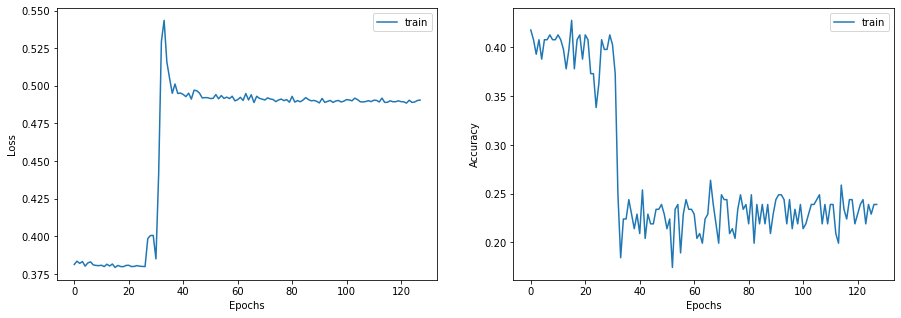

In [50]:
display_learning_curves(history)

In [19]:
def test_model(dataset, max_sample=10):
    for x, y in dataset:
        for s in range(0, min(x.shape[0], max_sample)):
            x_sample = x[s:s+1]
            y_sample = y[s:s+1]

            pred = model.predict(x_sample)[0]
            print(f"Pred: %{np.max(pred)*100} {categories[np.argmax(pred)]}\nTarget: {categories[np.argmax(y_sample)]}")
            plt.imshow(np.array(x_sample[0], dtype=np.int32))
            plt.show()
            time.sleep(3)
        break

1/1 [==============================] - 1s 936ms/step
Pred: %96.59 jute
Target: jute


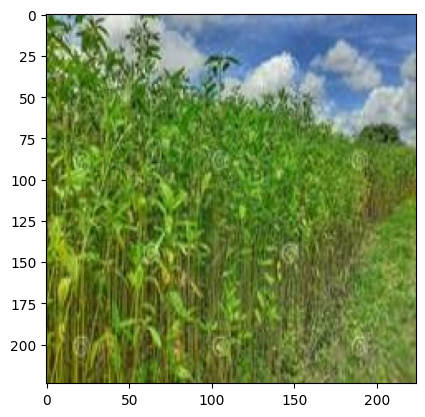

1/1 [==============================] - 0s 97ms/step
Pred: %73.26 rice
Target: rice


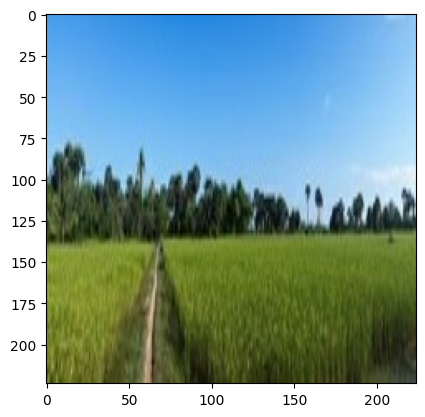

1/1 [==============================] - 0s 107ms/step
Pred: %99.24 wheat
Target: wheat


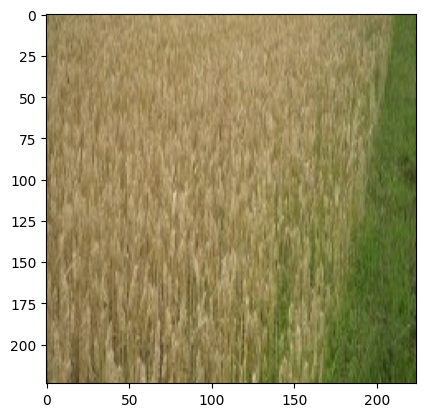

1/1 [==============================] - 0s 136ms/step
Pred: %73.47 jute
Target: wheat


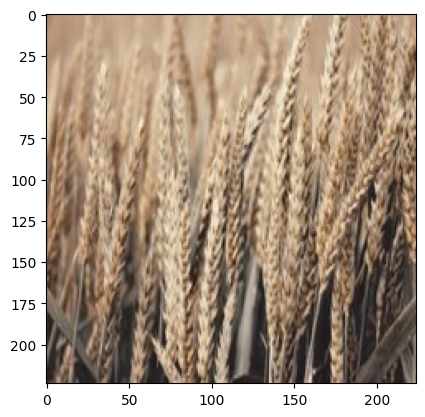

1/1 [==============================] - 0s 112ms/step
Pred: %94.10 maize
Target: maize


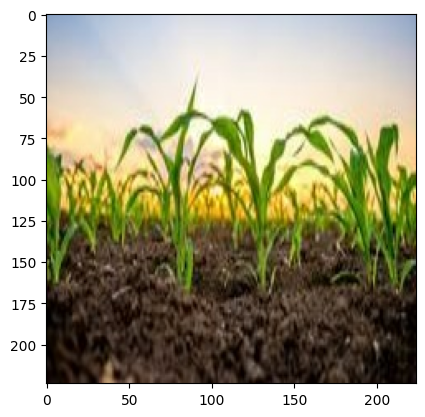

1/1 [==============================] - 0s 151ms/step
Pred: %94.71 sugarcane
Target: sugarcane


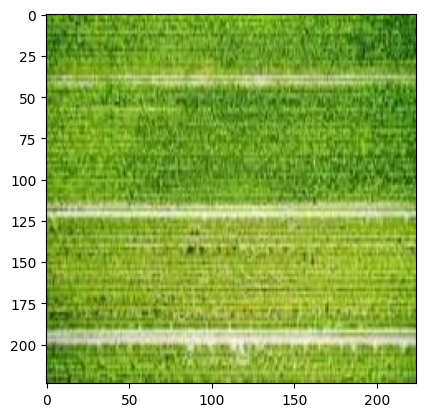

1/1 [==============================] - 0s 132ms/step
Pred: %94.71 sugarcane
Target: sugarcane


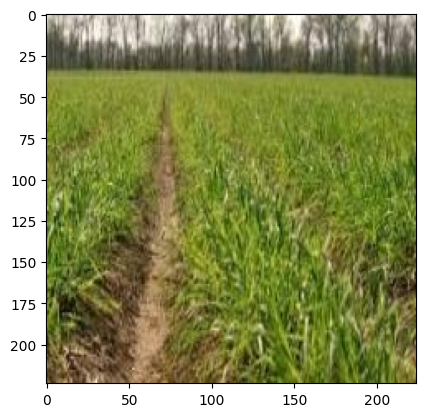

1/1 [==============================] - 0s 73ms/step
Pred: %68.08 maize
Target: wheat


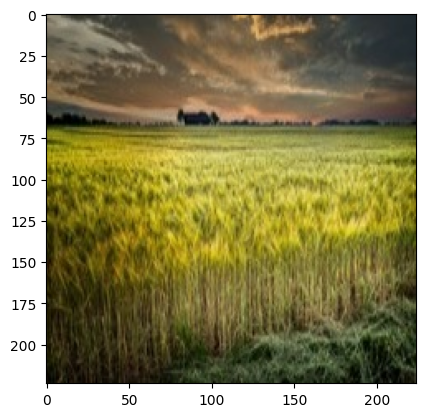

1/1 [==============================] - 0s 76ms/step
Pred: %94.10 maize
Target: maize


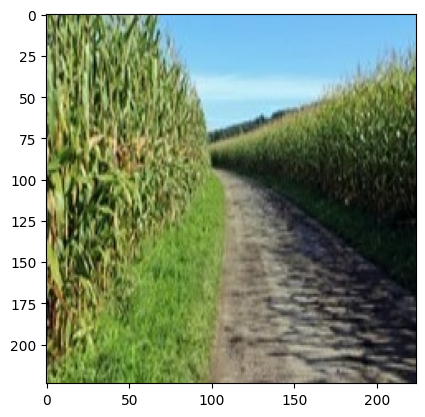

1/1 [==============================] - 0s 77ms/step
Pred: %94.10 maize
Target: maize


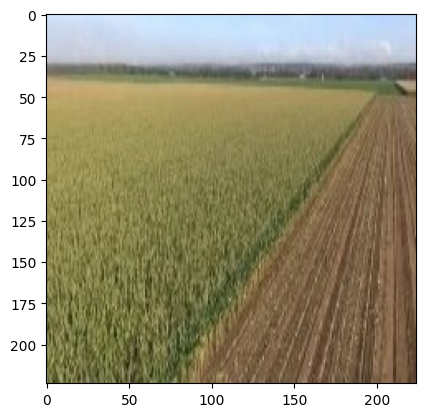

KeyboardInterrupt: 

In [18]:
test_model(crop_images)